Importing the Libraries

In [23]:
import pandas as pd
import numpy as np
import tensorflow as ts

## Data Preprocessing

Importing the dataset

In [24]:
df = pd.read_csv("Churn_Modelling.csv")
x = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [25]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [26]:
print(y)

[1 0 1 ... 1 1 0]


Checking the Datatypes

In [27]:
# Check datatype of dataframe
print(df.dtypes)


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Missing Value

In [28]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Encoding Categorical Variable

Label Encoding

In [29]:
# Label encoding gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])

In [30]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding

In [31]:
# One Hot Encoding on Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])], remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


#### Splitting the dataset into Training and Test Set

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 0)
print(x_train)

[[0.0 0.0 1.0 ... 1 0 163830.64]
 [0.0 1.0 0.0 ... 1 1 57098.0]
 [1.0 0.0 0.0 ... 1 0 185630.76]
 ...
 [1.0 0.0 0.0 ... 1 0 181429.87]
 [0.0 0.0 1.0 ... 1 1 148750.16]
 [0.0 1.0 0.0 ... 1 0 118855.26]]


#### Feature Scaling

Feature Scalling is most important in deep learning and it will always be applied in deep learning model. It is so important that irrespective of the values of a feture having 0 and 1, we will apply it to all the features.

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
print(x_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


In [35]:
print(x_test)

[[-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
   1.61085707]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   0.49587037]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   0.71888467]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -1.54507805]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   1.61255917]]


### Building the Artificial Neural Network

Initialize the ANN

Here we would initialize the sequential graph as opposed to other deep learning method called computational graph like boltzman machine.

In [36]:
ann = ts.keras.models.Sequential()

Add the input layer and first hidden layer

In [37]:
ann.add(ts.keras.layers.Dense(units = 9, activation = 'relu'))

Add the second Hidden layer

In [38]:
ann.add(ts.keras.layers.Dense(units = 9, activation = 'relu'))

Add output layer

Here we have a binary outcome for output hence the unit will be 1, for non binary outcome lets say output had to predict 3 variables(0,1,2) then unit would be 3 as the output would be one hot encoded and the activation function would be softmax.

In [39]:
ann.add(ts.keras.layers.Dense(units = 1, activation = 'sigmoid'))

### Training the ANN

Compiling the ANN

For compiling the ANN, We will call stochastic gradient descent optimizer here named as 'adam', loss function would be 'binary_crossentropy' where as for non binary output variable, the loss function would be 'categorical_crossentropy'

In [40]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

Training the ANN on training set

Default batch size is 32, can be used hyperparameter tuning to choose the best possible batch size and the epochs i.e. number of iterations for the model to learn correctly has been kept at 100 could be changed however keeping more than 100 might increase the execution time.

In [41]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3491 - loss: 0.8251
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.6272
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.5772
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.5418
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8241 - loss: 0.5090
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8318 - loss: 0.4329
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8319 - loss: 0.4132
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8288 - loss: 0.4156
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8377 - loss: 0.4076
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.3854
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8446 - loss: 0.3880
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

### Model Evaluation

Given the following condition, predict the churn of a customer:
- The customer has been a customer of the company for 3 years.
- The customer has made 2 purchases in the last year.
- The customer has spent $1000 in the last year.
- The customer is a 40 year old Male belongs to France having balance of $60000 with a credit score of 600.
- The customer is an active member have one credit card with an estimated salary of $50000   

Note: 
- Predict always accepts a 2d array
- Give the encoded values
- scale them with the earlier used method
- Output in True or False

In [44]:
print(ann.predict(sc.transform([[1,0,0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) >0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[False]]


Predicting on Test set

In [49]:
y_pred = ann.predict(x_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)), axis=1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.22665218]
 [0.25997156]
 [0.2826249 ]
 ...
 [0.31040466]
 [0.20733447]
 [0.16867396]]
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Making Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1518   77]
 [ 203  202]]


0.86

In [52]:
# import precision, recall and f1score
from sklearn.metrics import precision_score, recall_score, f1_score
# calculate precision, recall and f1score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print(precision)
print(recall)
print(f1_score)

0.7240143369175627
0.49876543209876545
0.5906432748538012


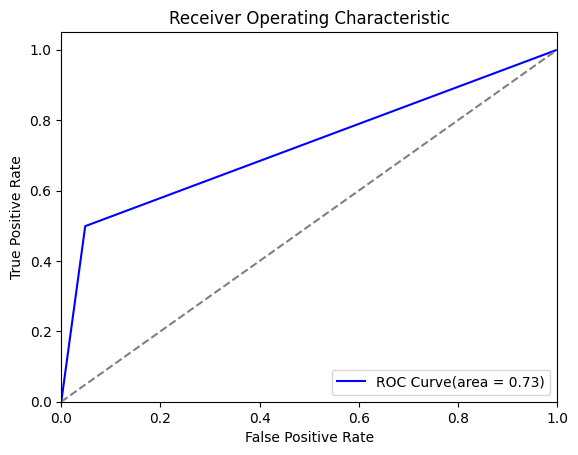

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color = 'blue', label = 'ROC Curve(area = %0.2f)' %roc_auc_score(y_test, y_pred))
plt.plot([0,1],[0,1], color = 'gray', linestyle = '--') # Diagonal Line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc = 'lower right')
plt.show()
